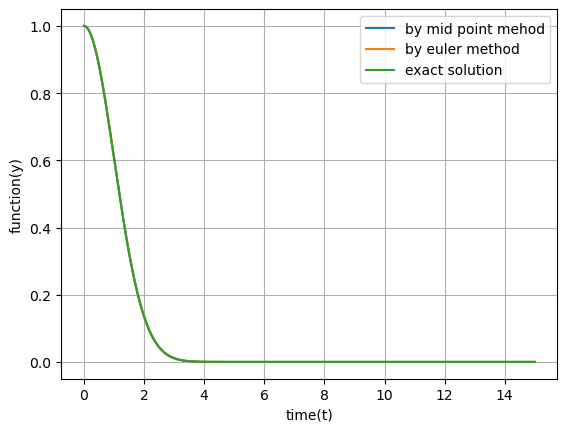

In [10]:
# Q1
# part A

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

########################################### Euler method #####################################################
def euler(f,h,t,y):
    return y + h*f(t,y)

########################################### Mid point method #################################################
def midpt(f,h,t,y):
    k1 = h*f(t,y)
    return y + h*f(t + h/2,y + k1/2)

"""
defined function , given dy/dt = -yt

"""
def f(t,y):
    return -y*t

# given data
h= 0.01   # step size
t0 = 0    # intial time
tf = 15   # final time
y0 = 1    # y at t=0


N = (tf-t0)/h +1               # total no. of temporal grid points
ts = np.arange(t0,tf + h, h)    # evaluated temporal points


# solving loop for euler method
y = y0
ys_euler = np.zeros(len(ts))
for i in range(len(ts)-1):
    t = ts[i]
    ys_euler[i] = y
    y = euler(f,h,t,y)
ys_euler[-1] = y       ## Store final value
    


# solving loop for mid point method
y = y0
ys_midpt = np.zeros(len(ts))
for i in range(len(ts)-1):
    t = ts[i]
    ys_midpt[i] = y
    y = midpt(f,h,t,y)
ys_midpt[-1] = y
    
# exact solution
ys_exact=np.exp(-(ts**2)/2)
    
    
# plotting
plt.plot(ts,ys_midpt,label='by mid point mehod')
plt.plot(ts,ys_euler, label ='by euler method')
plt.plot(ts,ys_exact,label='exact solution')
plt.xlabel('time(t)')
plt.ylabel('function(y)')
plt.legend()
plt.grid()
plt.show()

h               error (Euler)             error (Midpoint)         
----------------------------------------------------------------------------------------------------
1.00000e-04     7.49005e-51               2.88795e-54
1.58489e-04     1.16759e-50               7.25139e-54
2.51189e-04     1.80100e-50               1.81852e-53
3.98107e-04     2.74427e-50               4.57119e-53
6.30957e-04     4.08897e-50               1.14923e-52
1.00000e-03     5.93818e-50               2.91444e-52
1.58489e-03     8.04927e-50               7.26189e-52
2.51189e-03     1.03623e-49               1.84767e-51
3.98107e-03     1.23170e-49               4.77383e-51
6.30957e-03     1.26953e-49               1.19519e-50
1.00000e-02     1.38293e-49               3.54596e-50


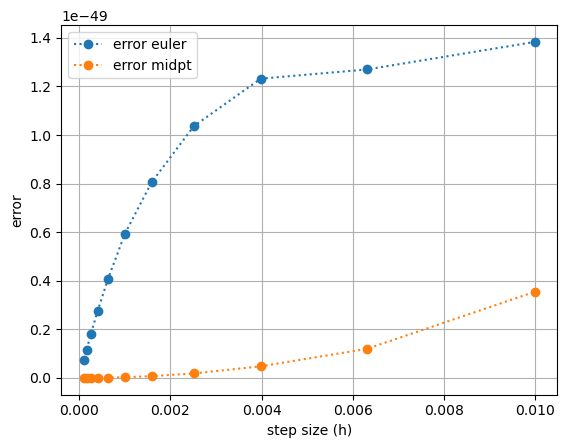

In [11]:
# Q1
# part B

n = np.arange(-4, -2 + 0.2, 0.2)  # Steps from -4 to -2
hs = [10**i for i in n]

print('h'.ljust(15), 'error (Euler)'.ljust(25), 'error (Midpoint)'.ljust(25))
print('-'*100)




error_euler_final_pt = np.zeros(len(hs))
error_midpt_final_pt = np.zeros(len(hs))

for k in range(len(hs)):
    h = hs[k]
    ts = np.arange(t0, tf + h, h)  # Proper endpoint to include tf
    ys_exact = np.exp(-ts**2 / 2)

    # Euler method
    y = y0
    ys_euler = np.zeros(len(ts))
    for i in range(len(ts) - 1):
        t = ts[i]
        ys_euler[i] = y
        y = euler(f, h, t, y)
    ys_euler[-1] = y  # Store final value

    # Midpoint method
    y = y0
    ys_midpt = np.zeros(len(ts))
    for i in range(len(ts) - 1):
        t = ts[i]
        ys_midpt[i] = y
        y = midpt(f, h, t, y)
    ys_midpt[-1] = y

    # Compute errors
    error_euler = abs(ys_exact[-1] - ys_euler[-1])
    error_midpt = abs(ys_exact[-1] - ys_midpt[-1])
    error_euler_final_pt[k] = error_euler
    error_midpt_final_pt[k] = error_midpt
    
    print(f"{h:<15.5e} {error_euler:<25.5e} {error_midpt:.5e}")
    
#plotting
plt.plot(hs, error_euler_final_pt,':o', label = 'error euler')
plt.plot(hs, error_midpt_final_pt, ':o', label = 'error midpt')
plt.xlabel('step size (h)')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.show()

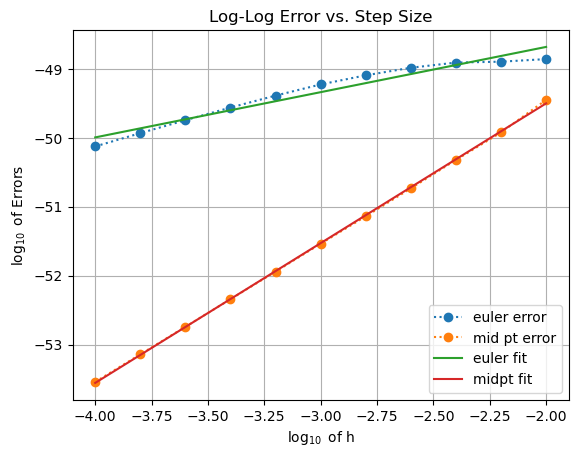

slope of liear fit for euler method is  0.655916624374517
slope of liear fit for mid point method is  2.0265932953488854

therefore the best method is mid point method


In [12]:
# Q1
# part C



log_hs = np.log10(hs)
log_error_euler = np.log10(error_euler_final_pt)
log_error_midpt = np.log10(error_midpt_final_pt)

### linear curve fit

# Define the fitting function
def l(x, p0, p1):
    return p0 * x + p1

# Fit the data
params_euler, _ = curve_fit(l,log_hs , log_error_euler, p0=[1.0, 1.0])
params_midpt, _ = curve_fit(l, log_hs, log_error_midpt, p0=[1.0, 1.0])


#plotting

plt.plot(log_hs,log_error_euler,':o', label='euler error ')
plt.plot(log_hs, log_error_midpt,':o', label = 'mid pt error' )

plt.plot(log_hs, l(log_hs, params_euler[0], params_euler[1]), label ='euler fit')
plt.plot(log_hs, l(log_hs, params_midpt[0], params_midpt[1]), label ='midpt fit')

plt.xlabel(r"$\log_{10}$ of h")
plt.ylabel(r"$\log_{10}$ of Errors")
plt.title("Log-Log Error vs. Step Size")

plt.legend()
plt.grid()
plt.show()



"""
efficinecy of the method, comparing the slope, the one with highest slope has the best accuracy!
      which method is best ???
      
"""

method_name = ['euler method', 'mid point method']
method_slope = [params_euler[0],params_midpt[0]]
                
def best_method(method_name, method_slope):
    best_slope = max(method_slope)
    for i in range(len(method_slope)):
        if best_slope == method_slope[i]:
            return method_name[i]

print('slope of liear fit for euler method is ',params_euler[0])
print('slope of liear fit for mid point method is ',params_midpt[0])
print('\n'+'therefore the best method is',best_method(method_name, method_slope))

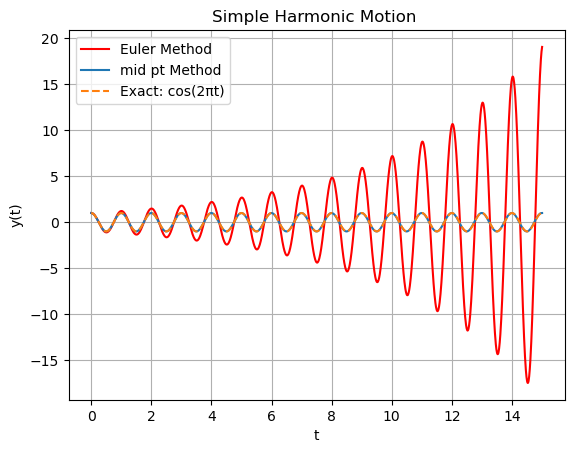

In [13]:
# Q2
# part A

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

"""

SHM converted into first-order system:
dy/dt = p
dp/dt = -4π² y

"""


def slope_of_y(t, p):
    return p

def slope_of_p(t, y):
    return -4 * (np.pi**2) * y

###########################################
# Initial Conditions and Parameters
###########################################
h = 0.01       # step size
t0 = 0
tf = 15
y0 = 1         # y(0)
p0 = 0         # dy/dt(0)

ts = np.arange(t0, tf + h, h)  # time array

###########################################
# Euler Loop
###########################################
y = y0
p = p0
ys_euler = np.zeros(len(ts))   # to store y values
for i in range(len(ts)-1):
    t = ts[i]
    ys_euler[i] = y

    y_old = y
    p_old = p
      
    y = y_old + h * slope_of_y(t, p_old)         # dy/dt = p
    p = p_old + h * slope_of_p(t, y_old)         # dp/dt = -4π² y

ys_euler[-1] = y  # store final value



###########################################
# Mid point Loop
###########################################
y = y0
p = p0
ys_midpt = np.zeros(len(ts))   # to store y values
for i in range(len(ts)-1):
    t = ts[i]
    ys_midpt[i] = y

    y_old = y
    p_old = p
    
    y_half = y_old + (h/2)*slope_of_y(t, p_old)
    p_half = p_old + (h/2)*slope_of_p(t, y_old)

    y = y_old + h*slope_of_y(t + h/2, p_half)
    p = p_old + h*slope_of_p(t + h/2, y_half)

ys_midpt[-1] = y  # store final value




############### Plotting 
plt.plot(ts, ys_euler, label='Euler Method', color = 'red')
plt.plot(ts, ys_midpt, label='mid pt Method')
plt.plot(ts, np.cos(2 * np.pi * ts), '--', label='Exact: cos(2πt)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Simple Harmonic Motion ')
plt.legend()
plt.grid()
plt.show()

h               error (Euler)             error (Midpoint)         
--------------------------------------------------------------------------------
1.00000e-04     3.00515e-02               2.90303e-09
1.58489e-04     4.80455e-02               5.33374e-09
2.51189e-04     7.72108e-02               1.15365e-08
3.98107e-04     1.25105e-01               6.59538e-09
6.30957e-04     2.05414e-01               1.14270e-07
1.00000e-03     3.44580e-01               2.73000e-06
1.58489e-03     5.98849e-01               4.95807e-07
2.51189e-03     1.10371e+00               1.44281e-05
3.98107e-03     2.24890e+00               9.42331e-05
6.30957e-03     5.46903e+00               2.16835e-04
1.00000e-02     1.80559e+01               1.00332e-03


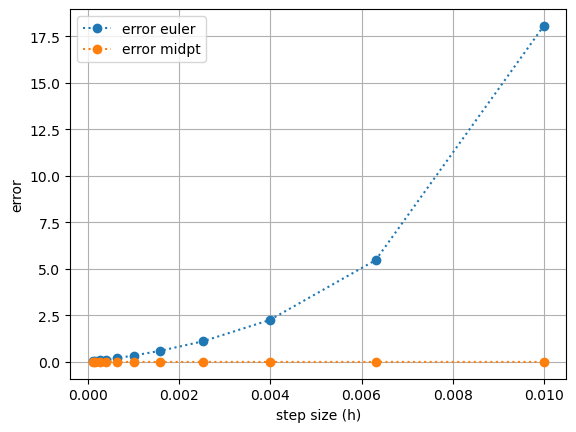

In [16]:
# Part B

# Q1
# part B

n = np.arange(-4, -2 + 0.2, 0.2)  # Steps from -4 to -2
hs = [10**i for i in n]

print('h'.ljust(15), 'error (Euler)'.ljust(25), 'error (Midpoint)'.ljust(25))
print('-'*80)




error_euler_final_pt = np.zeros(len(hs))
error_midpt_final_pt = np.zeros(len(hs))

for k in range(len(hs)):
    h = hs[k]
    ts = np.arange(t0, tf + h, h)  # Proper endpoint to include tf
    ys_exact = np.cos(2 * np.pi * ts)

    # Euler Loop
    y = y0
    p = p0
    ys_euler = np.zeros(len(ts))   # to store y values
    for i in range(len(ts)-1):
        t = ts[i]
        ys_euler[i] = y

        y_old = y
        p_old = p

        y = y_old + h * slope_of_y(t, p_old)         # dy/dt = p
        p = p_old + h * slope_of_p(t, y_old)         # dp/dt = -4π² y

    ys_euler[-1] = y  # store final value



   # Mid point Loop
    y = y0
    p = p0
    ys_midpt = np.zeros(len(ts))   # to store y values
    for i in range(len(ts)-1):
        t = ts[i]
        ys_midpt[i] = y

        y_old = y
        p_old = p

        y_half = y_old + (h/2)*slope_of_y(t, p_old)
        p_half = p_old + (h/2)*slope_of_p(t, y_old)

        y = y_old + h*slope_of_y(t + h/2, p_half)
        p = p_old + h*slope_of_p(t + h/2, y_half)

    ys_midpt[-1] = y  # store final value


    # Compute errors
    error_euler = abs(ys_exact[-1] - ys_euler[-1])
    error_midpt = abs(ys_exact[-1] - ys_midpt[-1])
    error_euler_final_pt[k] = error_euler
    error_midpt_final_pt[k] = error_midpt
    
    print(f"{h:<15.5e} {error_euler:<25.5e} {error_midpt:.5e}")
    
#plotting
plt.plot(hs, error_euler_final_pt,':o', label = 'error euler')
plt.plot(hs, error_midpt_final_pt, ':o', label = 'error midpt')
plt.xlabel('step size (h)')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.show()

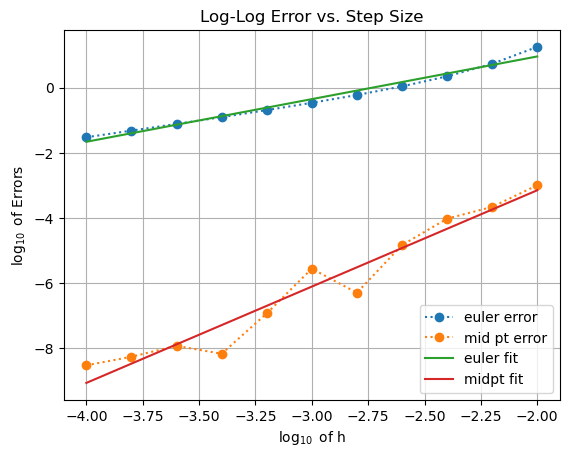

slope of liear fit for euler method is  1.312160135617407
slope of liear fit for mid point method is  2.962866000493138

therefore the best method is mid point method


In [17]:
# part C



log_hs = np.log10(hs)
log_error_euler = np.log10(error_euler_final_pt)
log_error_midpt = np.log10(error_midpt_final_pt)

### linear curve fit

# Define the fitting function
def l(x, p0, p1):
    return p0 * x + p1

# Fit the data
params_euler, _ = curve_fit(l,log_hs , log_error_euler, p0=[1.0, 1.0])
params_midpt, _ = curve_fit(l, log_hs, log_error_midpt, p0=[1.0, 1.0])


#plotting

plt.plot(log_hs,log_error_euler,':o', label='euler error ')
plt.plot(log_hs, log_error_midpt,':o', label = 'mid pt error' )

plt.plot(log_hs, l(log_hs, params_euler[0], params_euler[1]), label ='euler fit')
plt.plot(log_hs, l(log_hs, params_midpt[0], params_midpt[1]), label ='midpt fit')

plt.xlabel(r"$\log_{10}$ of h")
plt.ylabel(r"$\log_{10}$ of Errors")
plt.title("Log-Log Error vs. Step Size")

plt.legend()
plt.grid()
plt.show()



"""
efficinecy of the method, comparing the slope, the one with highest slope has the best accuracy!
      which method is best ???
      
"""

method_name = ['euler method', 'mid point method']
method_slope = [params_euler[0],params_midpt[0]]
                
def best_method(method_name, method_slope):
    best_slope = max(method_slope)
    for i in range(len(method_slope)):
        if best_slope == method_slope[i]:
            return method_name[i]

print('slope of liear fit for euler method is ',params_euler[0])
print('slope of liear fit for mid point method is ',params_midpt[0])
print('\n'+'therefore the best method is',best_method(method_name, method_slope))